In [84]:
%load_ext blackcellmagic
from pathlib import Path
import yaml
import numpy as np
import matplotlib.pyplot as plt

FILEPATH = Path("__file__").resolve().parent
RESULTSPATH = Path("/home/pedro/mount/datafactory/puncs")




The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [85]:
indices2path = {
    "MNIST": "mnist",
    "FashionMNIST": "fmnist",
    "E-MNIST": "emnist:mnist",
    "E-LETTERS": "emnist:letters",
    "E-BALANCED": "emnist:balanced",
    "E-BYCLASS": "emnist:byclass",
}


In [86]:
components = [2,4,8,16,32,64,128]

def _get_data(path):
    seeds = range(42, 47)

    mean_bpd = []
    min_bpd = []
    max_bpd = []

    mean_bpd_rand = []
    min_bpd_rand = []
    max_bpd_rand = []


    for c in components:
        bpd = []
        bpd_rand = []


        for s in seeds:
            seed_path = path / f"c-{c}"/ f"seed-{s}"/ "results.yaml"
            with open(seed_path, "r") as file:
                d = yaml.safe_load(file)




            bpd.append(d["test"]["bpd"])
            bpd_rand.append(d["randomtest"]["bpd"])

        mean_bpd.append(sum(bpd) / len(bpd))
        min_bpd.append(min(bpd))
        max_bpd.append(max(bpd))


        mean_bpd_rand.append(sum(bpd_rand) / len(bpd_rand))
        min_bpd_rand.append(min(bpd_rand))
        max_bpd_rand.append(max(bpd_rand))

    bpd = {"mean": mean_bpd, "min": min_bpd, "max": max_bpd}
    bpd_rand = {"mean": mean_bpd_rand, "min": min_bpd_rand, "max": max_bpd_rand}

    return bpd, bpd_rand


def get_data():


    data_bpd = {}
    data_bpd_rand = {}

    for k, v in indices2path.items():

        fl=64



        data_path = (
            RESULTSPATH
            / "results"
            / f"{indices2path[k]}"
            / f"precision-{fl}"
        )

        print(data_path)

        bpd, bpd_rand= _get_data(data_path)
        data_bpd[k] = bpd
        data_bpd_rand[k] = bpd_rand



    return data_bpd, data_bpd_rand






/home/pedro/mount/datafactory/puncs/results/mnist/precision-64
/home/pedro/mount/datafactory/puncs/results/fmnist/precision-64
/home/pedro/mount/datafactory/puncs/results/emnist:mnist/precision-64
/home/pedro/mount/datafactory/puncs/results/emnist:letters/precision-64
/home/pedro/mount/datafactory/puncs/results/emnist:balanced/precision-64
/home/pedro/mount/datafactory/puncs/results/emnist:byclass/precision-64


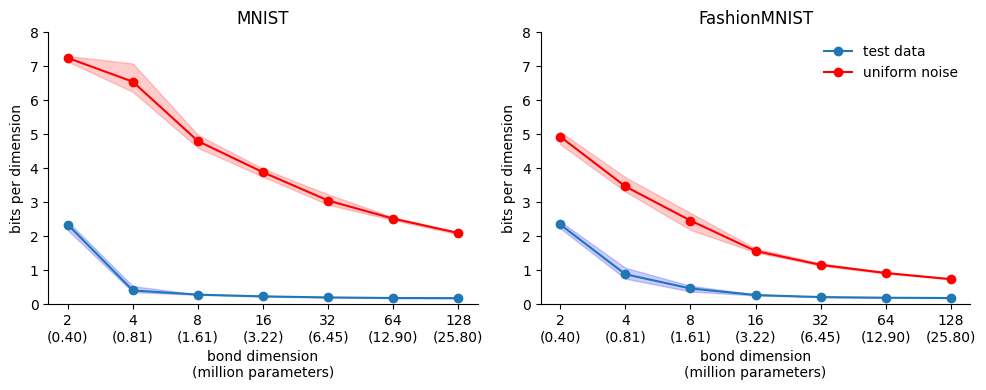

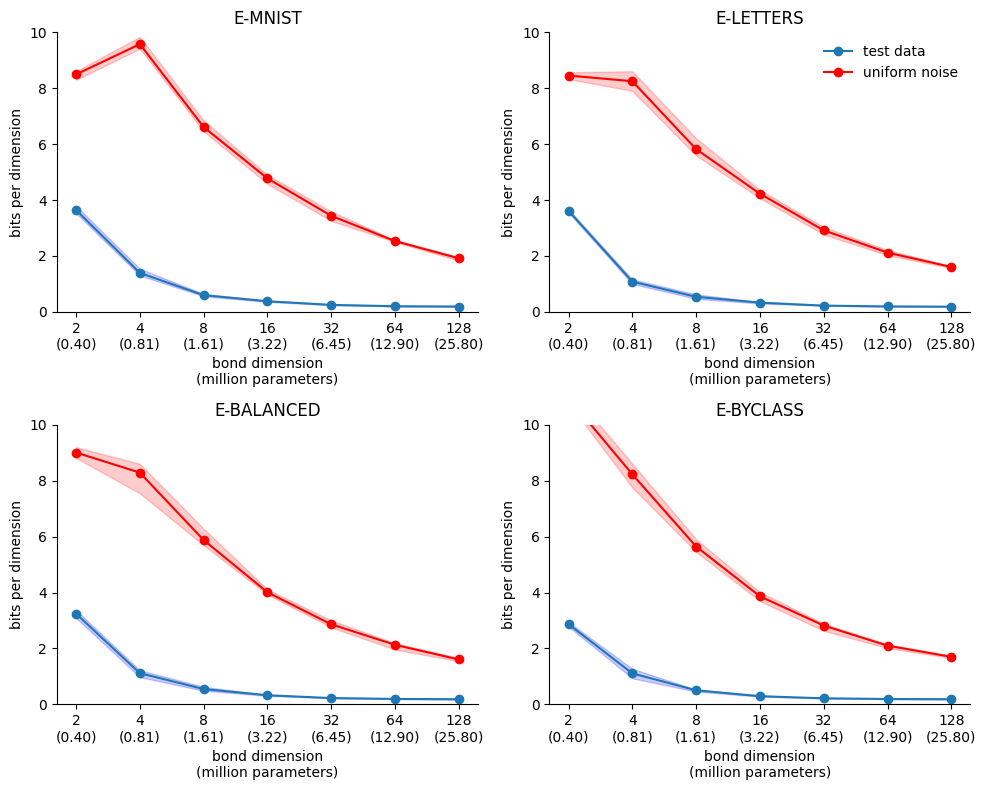

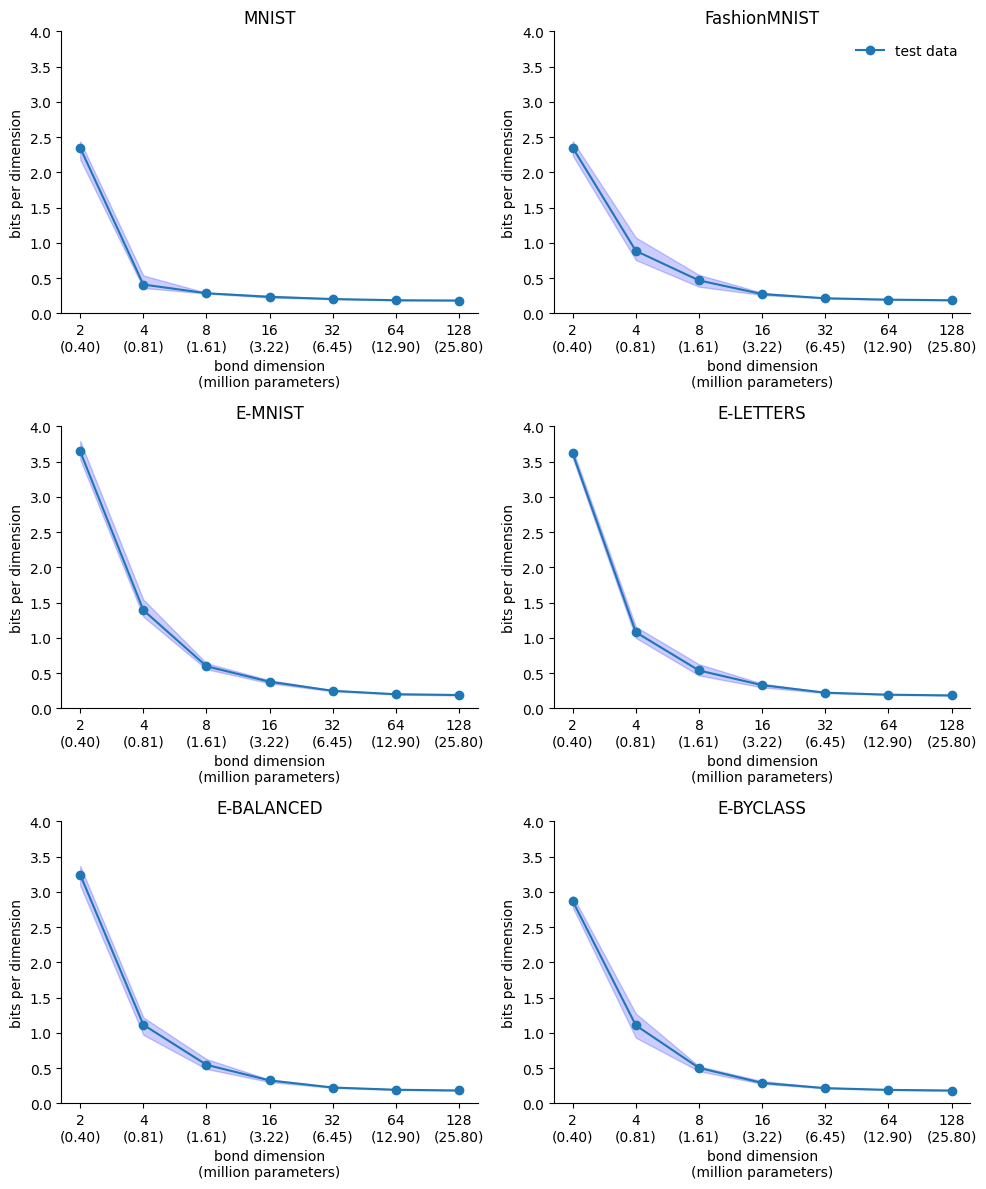

In [92]:


# dataset2pltpos = {
#     # "MNIST": 1,
#     "FashionMNIST": 2,
#     "E-MNIST": 3,
#     "E-LETTERS": 4,
#     "E-BALANCED": 5,
#     # "E-BYCLASS": 6,
# }










def make_plots(dataset2pltpos, data, data_rand, x_labels,ylim,savename, noise=True):

    data_points = np.arange(7)

    n_rows=  (len(dataset2pltpos.keys())+1) // 2


    plt.figure(figsize=(10 , 4*n_rows))
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.25)



    for ds in dataset2pltpos.keys():

        mean_values = data[ds]["mean"]
        min_values = data[ds]["min"]
        max_values = data[ds]["max"]

        mean_values_rand = data_rand[ds]["mean"]
        min_values_rand = data_rand[ds]["min"]
        max_values_rand = data_rand[ds]["max"]

        ax=plt.subplot(n_rows, 2, dataset2pltpos[ds])




        plt.plot(data_points, mean_values, label="test data", marker='o')
        plt.fill_between(data_points, min_values, max_values, color='blue', alpha=0.2)

        if noise:
            plt.plot(data_points, mean_values_rand, label="uniform noise", marker='o', color='red')
            plt.fill_between(data_points, min_values_rand, max_values_rand, color='red', alpha=0.2)







        plt.xlabel('bond dimension\n(million parameters)')
        plt.ylabel('bits per dimension')

        plt.xticks(data_points, x_labels)
        plt.ylim(0, ylim)

        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)

        ax.set_title(ds)

        if dataset2pltpos[ds]==2:
            ax.legend( frameon=False)


    plt.tight_layout()
    # Display the plot
    plt.savefig(savename)
    plt.show()




data, data_rand = get_data()
n_params = [0.40, 0.81, 1.61, 3.22, 6.45, 12.90, 25.80]

x_labels = []
for i in range(len(n_params)):
    x_labels.append(f"{components[i]}\n({n_params[i]:.2f})")



dataset2pltpos = {
    "MNIST": 1,
    "FashionMNIST": 2,
}
ylim=8
savename= "mnist.pdf"
make_plots(dataset2pltpos, data, data_rand, x_labels,ylim,savename)


dataset2pltpos = {
    "E-MNIST": 1,
    "E-LETTERS": 2,
    "E-BALANCED": 3,
    "E-BYCLASS": 4,
}
ylim=10
savename= "emnist.pdf"
make_plots(dataset2pltpos, data, data_rand, x_labels,ylim,savename)



dataset2pltpos = {
    "MNIST": 1,
    "FashionMNIST": 2,
    "E-MNIST": 3,
    "E-LETTERS": 4,
    "E-BALANCED": 5,
    "E-BYCLASS": 6,
}
ylim=4
savename= "all_nonoise.pdf"
make_plots(dataset2pltpos, data, data_rand, x_labels,ylim,savename,noise=False)

